In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
folder = r"data\raw_data"
train_df = pd.read_csv(os.path.join(folder, "train.csv"))

In [4]:
print("First 10 rows:")
display(train_df.head())
print("---------------------")
print("Dataset summary")
display(train_df.describe())
print("---------------------")

First 10 rows:


,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


---------------------
Dataset summary


,id,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,216506.495284,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,0.000000,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,187499.750000,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,374999.500000,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,562499.250000,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,749999.000000,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


---------------------


The dataset consists of 750,000 data points, with 10 columns. 'id', 'Temparature' (sic), 'Humidity', 'Moisture',
'Nitrogen', 'Potassium' and 'Phosphorous' are numerical. 'Soil Type', 'Crop Type','Fertilizer Name' are catagorical saved as string input. 'Fertilizer Name' has 7 categories, ans are roughly evenly present. (between 12.3% and 15.2%). 'Soil Type' has 5 categories, also roughly evenly present (between 19.4% and 20.9%). 'Crop Type' has 11 categories, again evenly-ish split (between 8% and 11.5%).

In [5]:
print(train_df['Fertilizer Name'].value_counts()/750000) 

Fertilizer Name
14-35-14    0.152581
10-26-26    0.151849
17-17-17    0.149937
28-28       0.148211
20-20       0.147852
DAP         0.126480
Urea        0.123089
Name: count, dtype: float64


In [6]:
print(train_df.columns)

Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


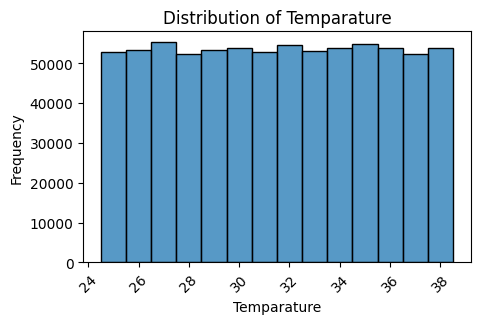

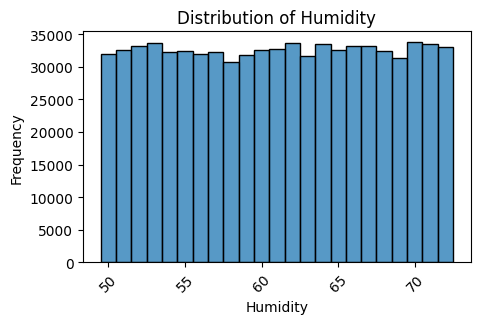

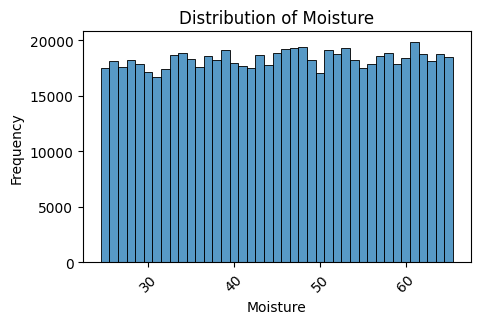

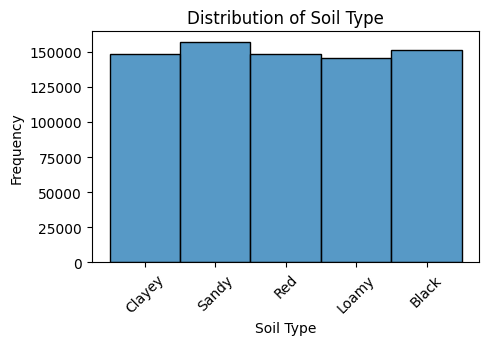

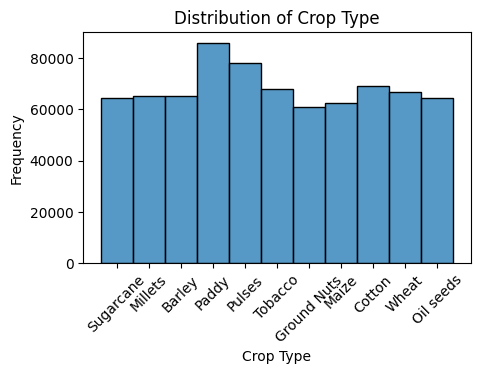

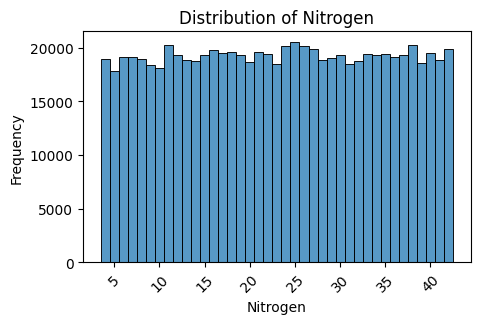

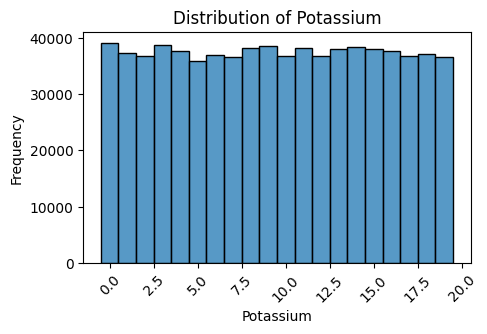

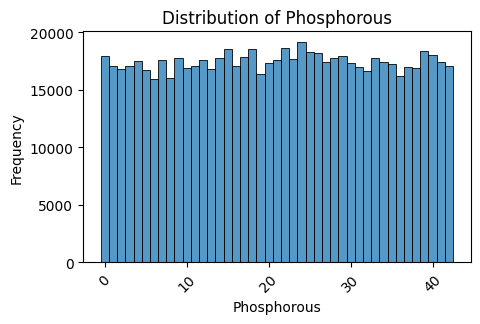

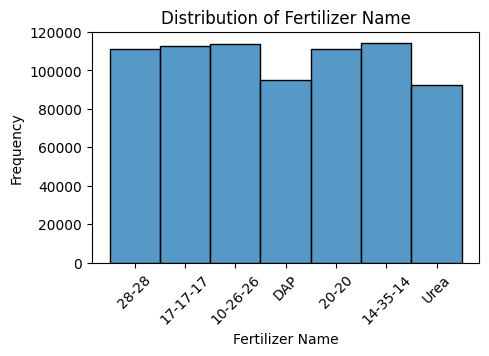

In [7]:
for label in ['Temparature', 'Humidity', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name']:
    plt.figure(figsize=(5, 3))
    sns.histplot(train_df[label], discrete = True)
    plt.title(f'Distribution of {label}')
    plt.xlabel(label)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

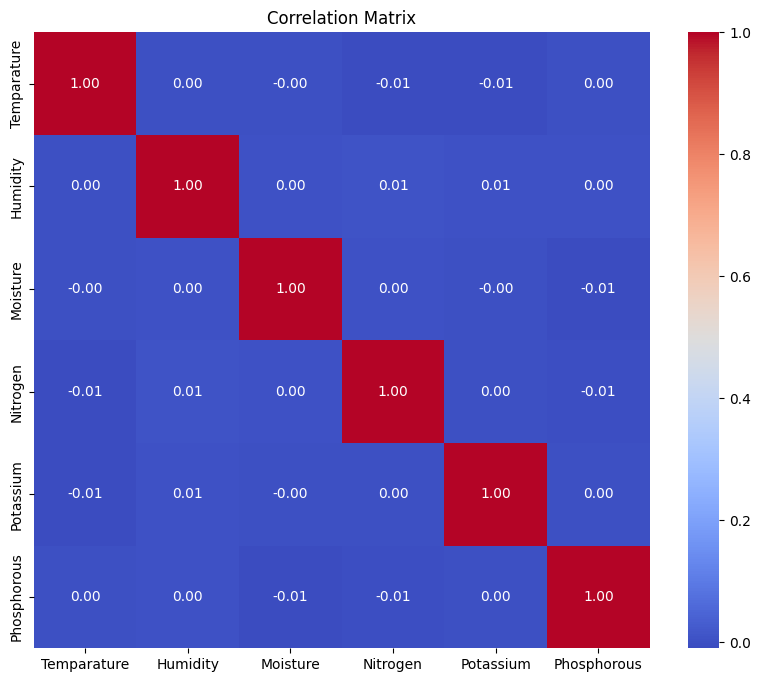

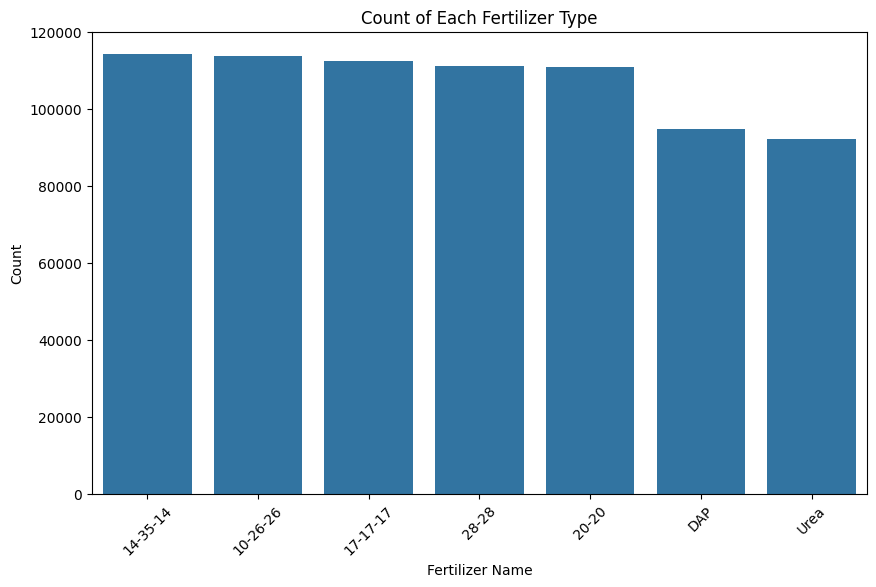

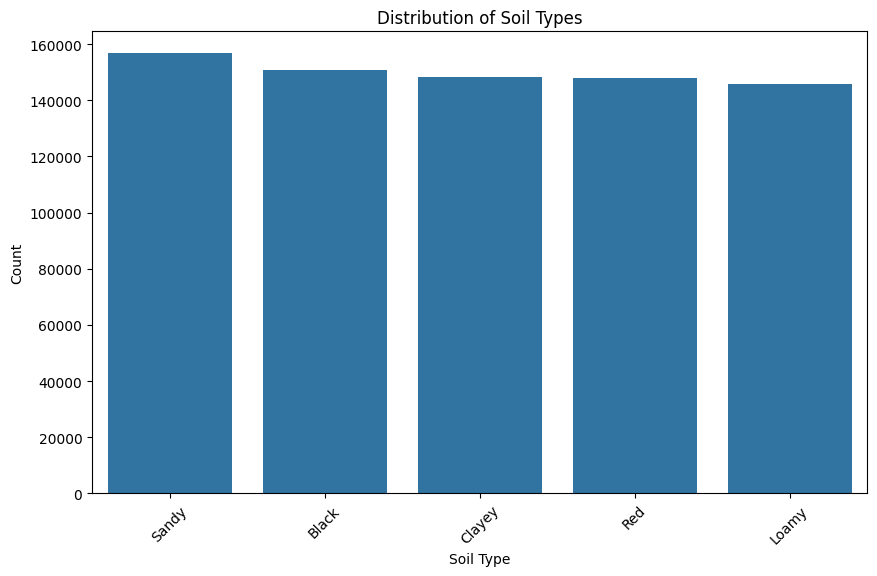

In [ ]:
# Displaying the correlation matrix
plt.figure(figsize=(10, 8))
#correlation_matrix = train_df[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']].corr()
correlation_matrix = train_df[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
# Displaying the pairplot for selected features
sns.pairplot(train_df, vars=['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'], hue='Fertilizer Name')
plt.show()
# Displaying the count of each fertilizer type
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Fertilizer Name', order=train_df['Fertilizer Name'].value_counts().index)
plt.title('Count of Each Fertilizer Type')
plt.xticks(rotation=45)
plt.xlabel('Fertilizer Name')
plt.ylabel('Count')
plt.show()
# Displaying the distribution of soil types
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Soil Type', order=train_df['Soil Type'].value_counts().index)
plt.title('Distribution of Soil Types')
plt.xticks(rotation=45)
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()


In [ ]:
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=train_df, x='Fertilizer Name', y=feature, inner='quartile', palette='Set2')
    plt.title(f'Distribution of {feature} by Fertilizer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.decomposition import PCA

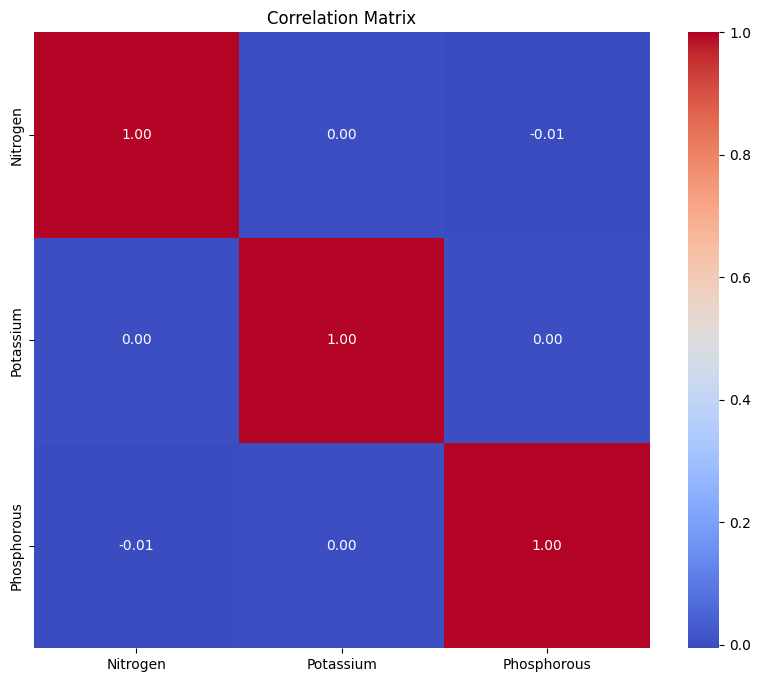

In [17]:
# Displaying the correlation matrix

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_df_scale = pd.DataFrame(columns=['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'])
train_df_scale[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']] = scale.fit_transform(train_df[['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']])
plt.figure(figsize=(10, 8))
correlation_matrix = train_df_scale[['Nitrogen', 'Potassium', 'Phosphorous']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import numpy as np

pca_df = train_df.copy()
pca_df['Soil Type'] = LabelEncoder().fit_transform(pca_df['Soil Type'])
pca_df['Crop Type'] = LabelEncoder().fit_transform(pca_df['Crop Type'])
pca_df['Fertilizer Name'] = LabelEncoder().fit_transform(pca_df['Fertilizer Name'])
X = pca_df.drop(['Fertilizer Name'],inplace=False, axis =1)
y = pca_df['Fertilizer Name'] 

X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
# Perform PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Fertilizer Name'] = y

#plt.figure(figsize=(10, 6))
#sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Fertilizer Name', palette='tab10')
#plt.title("PCA Projection")
#plt.tight_layout()
#plt.show()

[0.1131556  0.11242899 0.11196584 0.11147538 0.11108625 0.11063441
 0.11029351 0.11021442 0.10874559]


ValueError: Shape of passed values is (750000, 9), indices imply (750000, 2)

In [19]:
pca_df.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,1,8,36,4,5,4
1,1,27,69,65,4,4,30,6,18,4
2,2,29,63,32,4,4,24,12,16,2
3,3,35,62,54,4,0,39,12,4,0
4,4,35,58,43,3,6,37,2,16,5


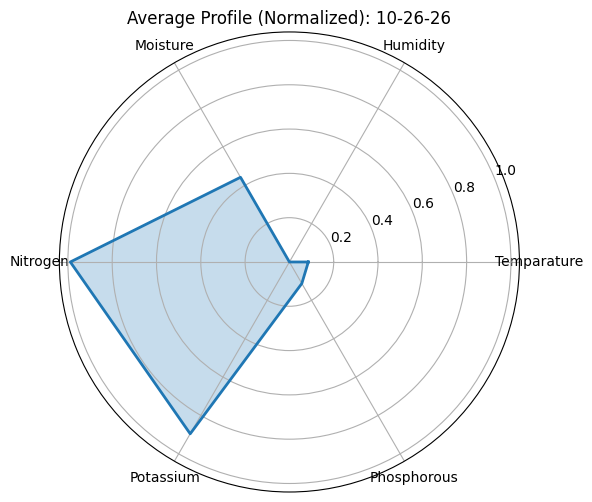

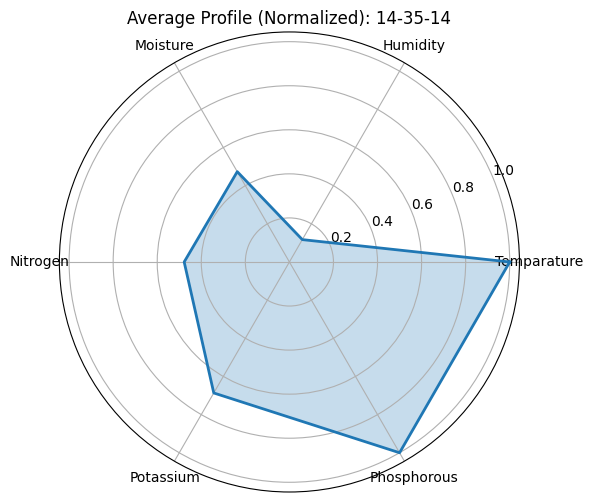

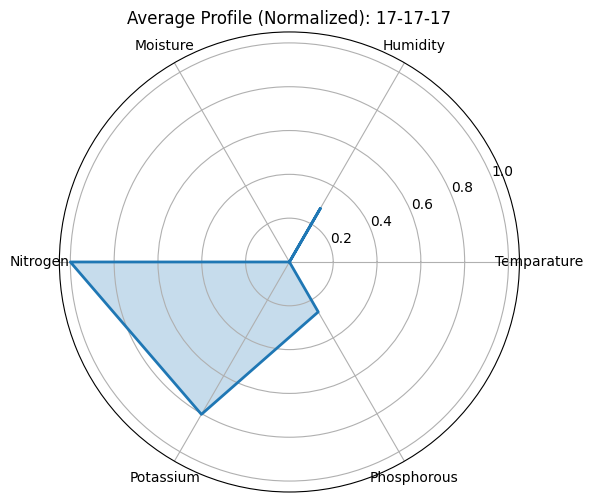

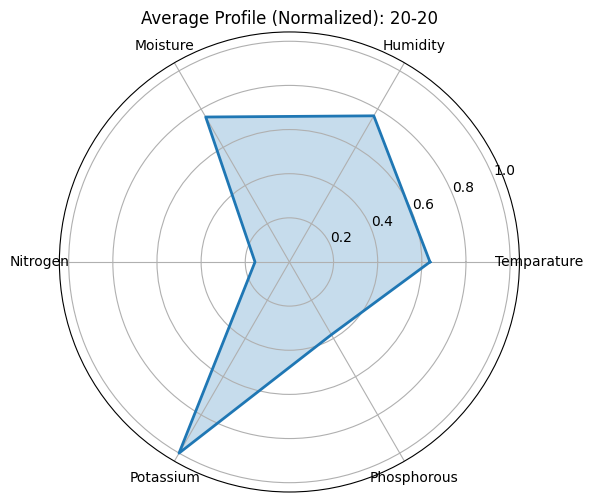

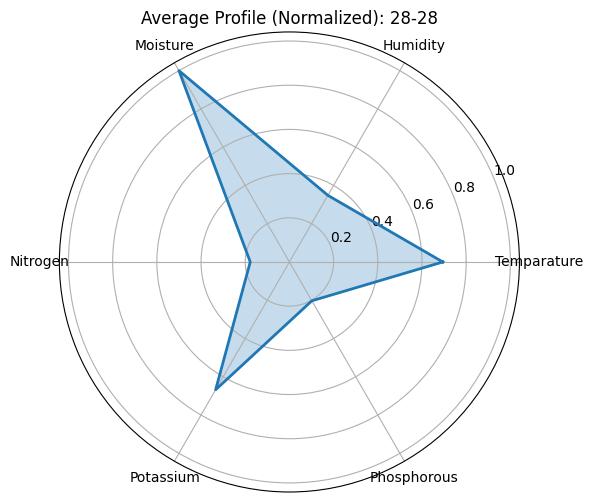

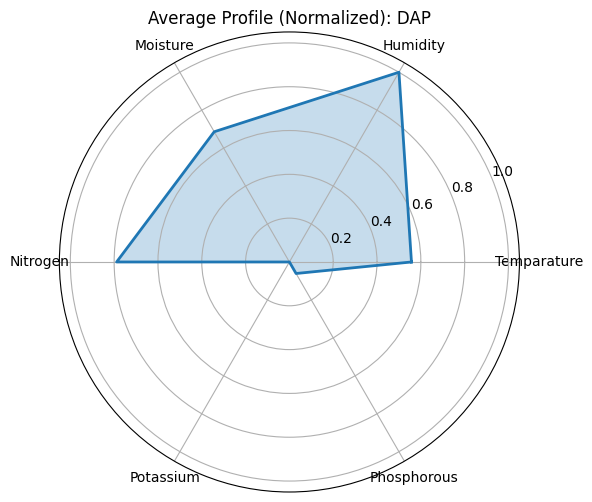

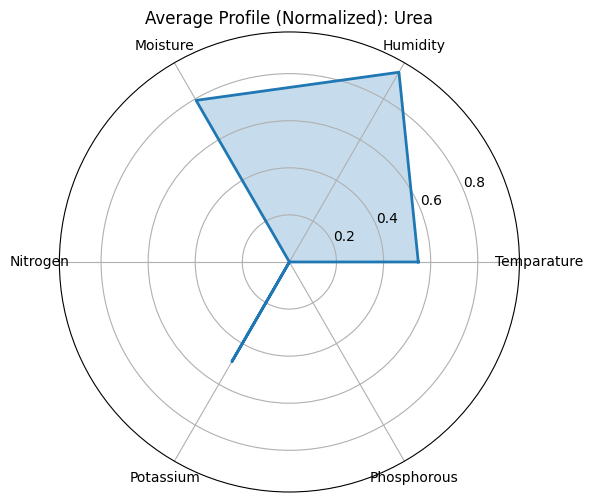

In [30]:
from math import pi
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
radar_data = train_df.groupby('Fertilizer Name')[features].mean().reset_index()

# Define the features you used earlier (replace with your actual column names if different)
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']
categories = features
N = len(categories)

# Normalize data
scaler = MinMaxScaler()
radar_scaled = radar_data.copy()
radar_scaled[features] = scaler.fit_transform(radar_scaled[features])

# Radar plot per fertilizer
for i in range(len(radar_scaled)):
    values = radar_scaled.iloc[i, 1:].tolist()
    values += values[:1]  # repeat first value to close the loop
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=radar_scaled['Fertilizer Name'][i])
    ax.fill(angles, values, alpha=0.25)
    plt.title(f"Average Profile (Normalized): {radar_scaled['Fertilizer Name'][i]}")
    plt.tight_layout()
    plt.show()

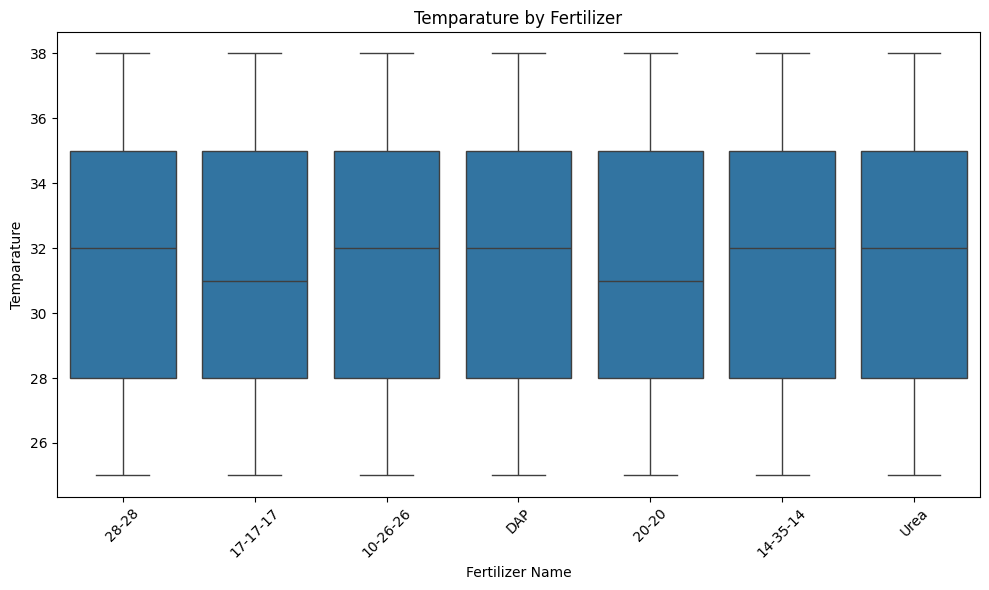

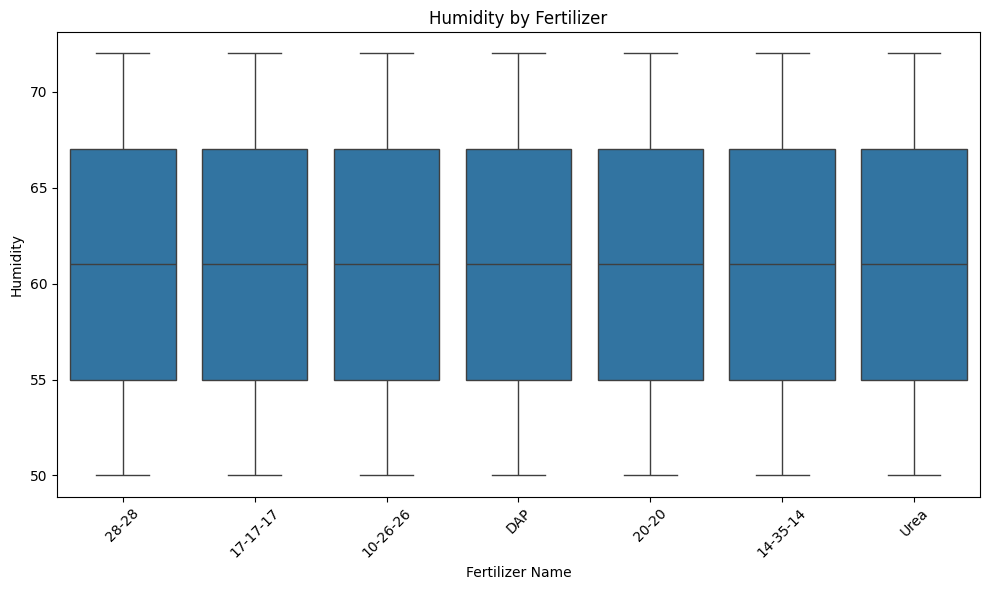

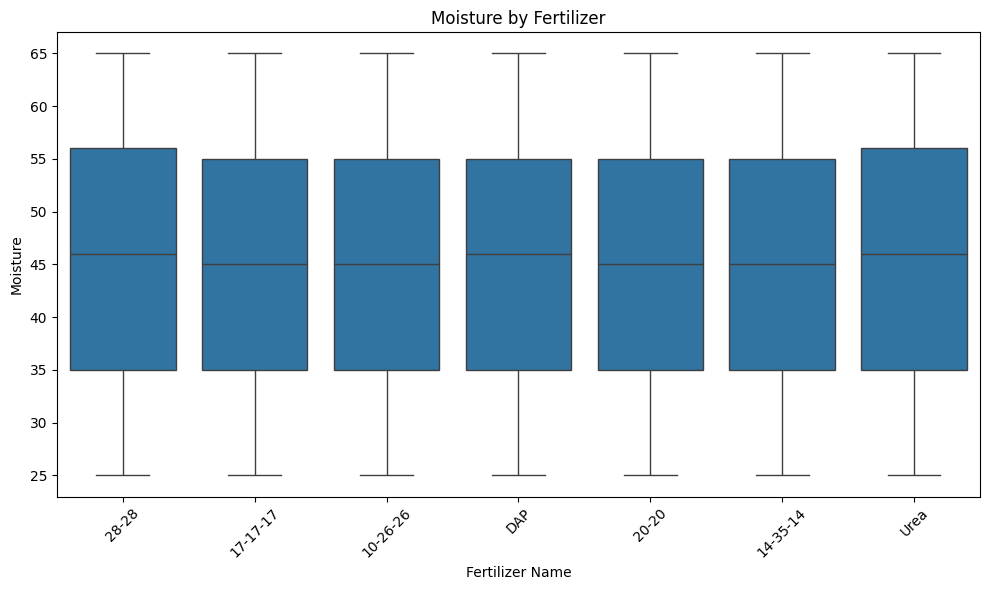

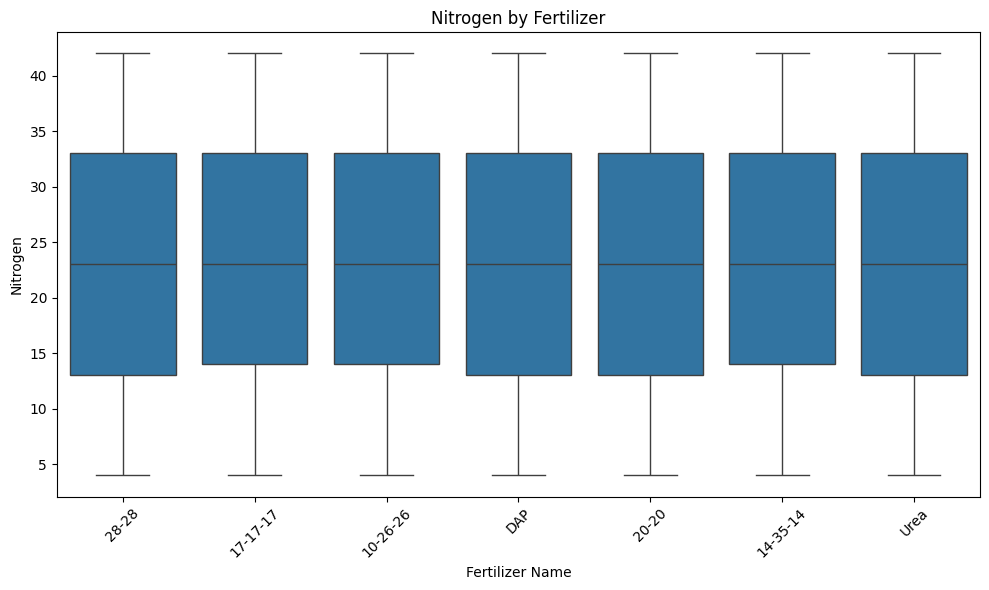

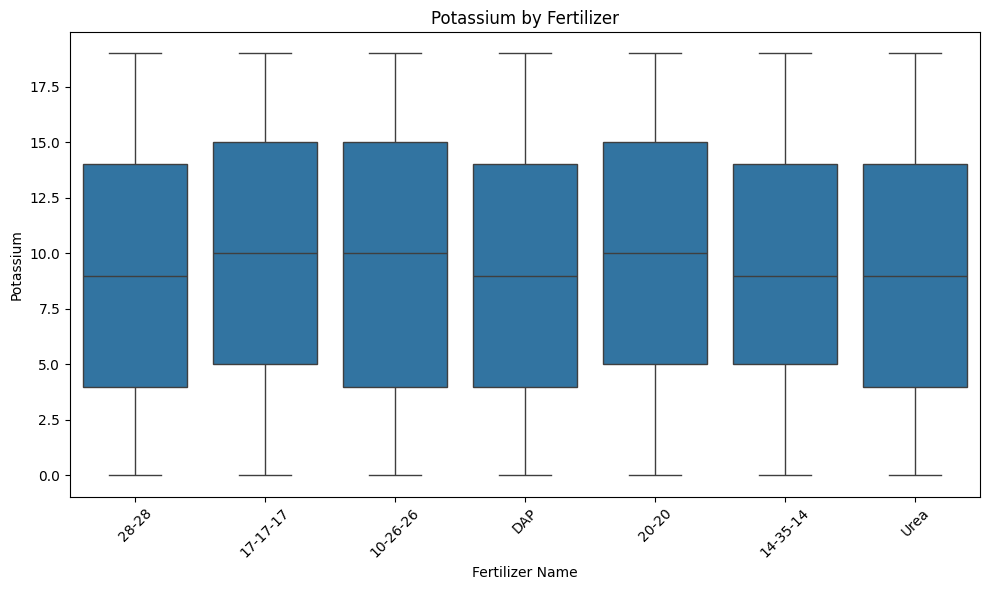

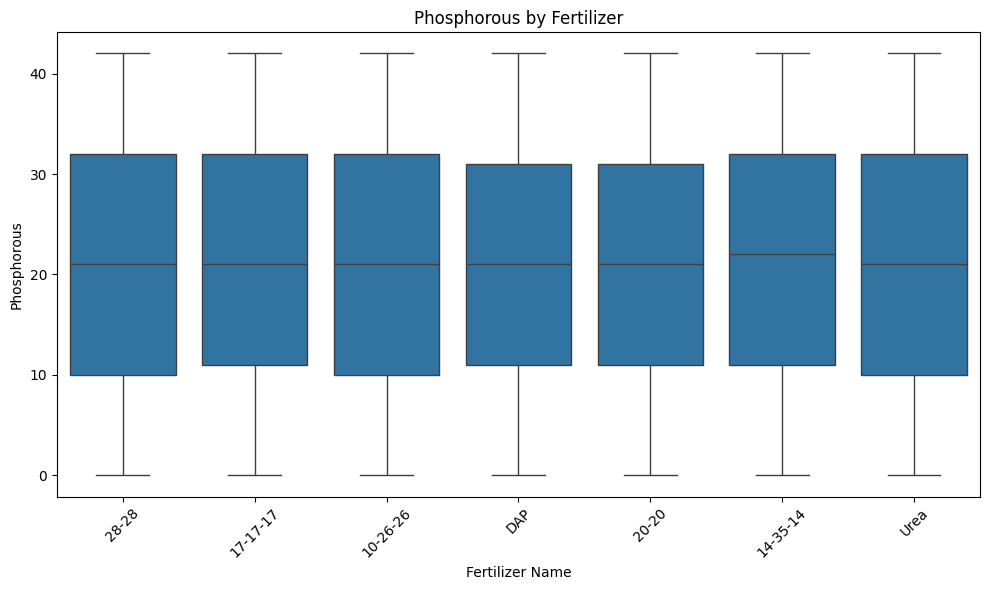

In [32]:
numerical_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_df, x='Fertilizer Name', y=feature)
    plt.title(f'{feature} by Fertilizer')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: >

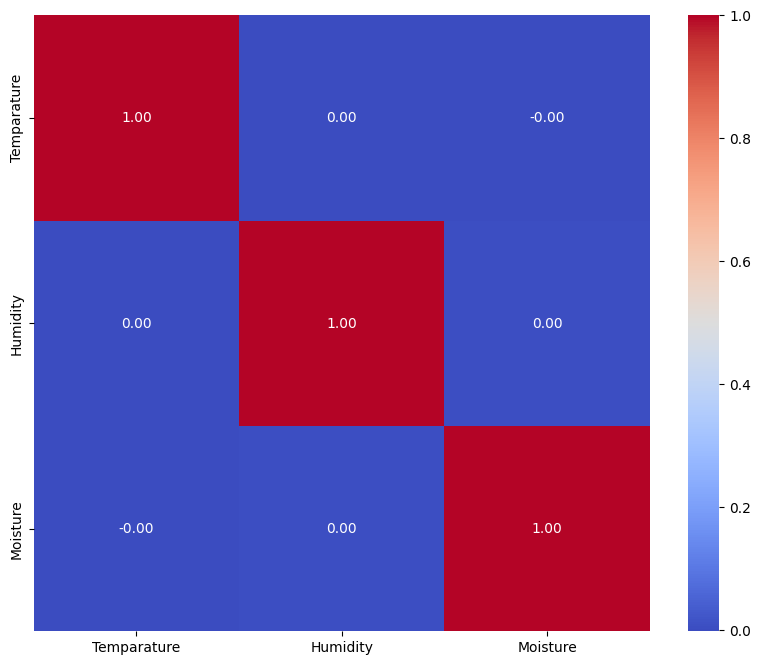

In [ ]:
from sklearn.preprocessing import StandardScaler
l = StandardScaler()
corr_df = pd.DataFrame()
corr_df[['Temparature', 'Humidity', 'Moisture']] = l.fit_transform(train_df[['Temparature', 'Humidity', 'Moisture']])
correlation_matrix = corr_df[['Temparature', 'Humidity', 'Moisture']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

In [43]:
train_df[['Temparature', 'Humidity', 'Moisture']].describe()

,Temparature,Humidity,Moisture
count,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147
std,4.025574,6.647695,11.794594
min,25.000000,50.000000,25.000000
25%,28.000000,55.000000,35.000000
50%,32.000000,61.000000,45.000000
75%,35.000000,67.000000,55.000000
max,38.000000,72.000000,65.000000


C:\Users\Amna\AppData\Local\Temp\ipykernel_36284\618249245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minerals_df['Total Minerals'] = train_df['Nitrogen'] + train_df['Potassium']+train_df['Phosphorous']
C:\Users\Amna\AppData\Local\Temp\ipykernel_36284\618249245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minerals_df['Nitrogen'] = minerals_df['Nitrogen']/minerals_df['Total Minerals']
C:\Users\Amna\AppData\Local\Temp\ipykernel_36284\618249245.py:4: SettingWithCopyWarning: 
A value is trying t

<Axes: >

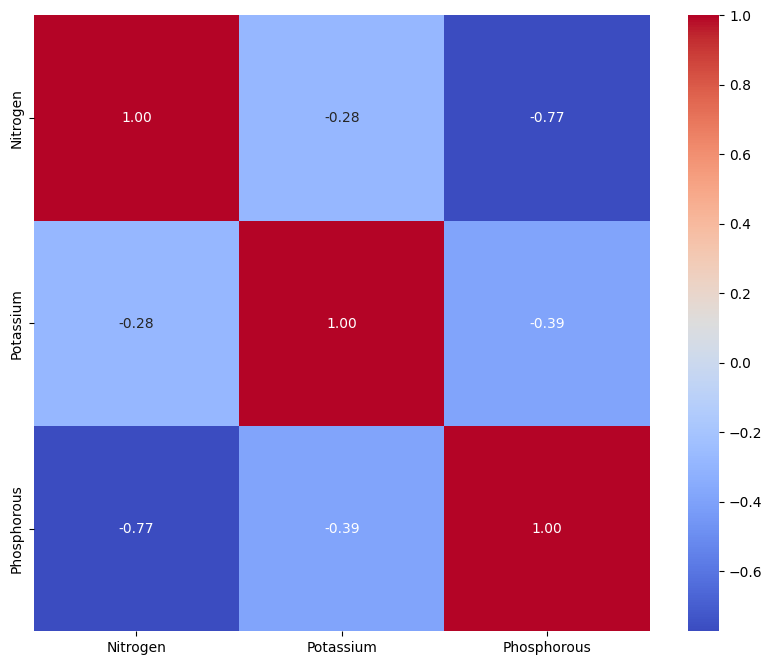

In [49]:
minerals_df = train_df[['Nitrogen', 'Potassium', 'Phosphorous']]
minerals_df['Total Minerals'] = train_df['Nitrogen'] + train_df['Potassium']+train_df['Phosphorous']
minerals_df['Nitrogen'] = minerals_df['Nitrogen']/minerals_df['Total Minerals']
minerals_df['Potassium'] = minerals_df['Potassium']/minerals_df['Total Minerals']
minerals_df['Phosphorous'] = minerals_df['Phosphorous']/minerals_df['Total Minerals']

correlation_matrix = minerals_df[['Nitrogen', 'Potassium', 'Phosphorous']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)